In [201]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

blue_gray_cmap = LinearSegmentedColormap.from_list(
    "blue_gray",
    ["#2d4ca3", "#8e8e8e"]   
)

In [191]:
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/orincon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/orincon/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [187]:
# Utilities
def load_text(path):
    chunks = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            chunks.append(line.lower())
    return "".join(chunks)

# Load text
text = load_text("data/text.txt")

In [223]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# ---- TEXT CLEANING ----

# lowercase
text_ = text.lower()

# remove citations like (Smith et al., 2020)
text_ = re.sub(r"\([^)]*\d{4}[^)]*\)", "", text_)

# remove numbers
text_ = re.sub(r"\d+", " ", text_)

# remove punctuation
text_ = re.sub(r"[^\w\s]", " ", text_)

# tokenize
tokens = word_tokenize(text_)

# POS tagging
pos_tags = nltk.pos_tag(tokens)

# remove stopwords + single letters + lemmatize
filtered_tokens = [
    lemmatizer.lemmatize(word)
    for word, pos in pos_tags
    if pos.startswith("NN")          
    and word.isalpha()
    and len(word) > 2
    and word not in stop_words
]

word_counts = Counter(filtered_tokens)

# percentage threshold
threshold = 0.005   # 0.1% of total tokens

min_count = int(len(filtered_tokens) * threshold)

generic_words = {
    word for word, count in word_counts.items()
    if count >= min_count
}

filtered_tokens_ = [
    word for word in filtered_tokens
    if word not in generic_words
]

# reconstruct cleaned text
text_ = " ".join(filtered_tokens_)

In [229]:
generic_words

{'data',
 'equation',
 'fig',
 'figure',
 'frequency',
 'function',
 'input',
 'inversion',
 'layer',
 'learning',
 'method',
 'model',
 'network',
 'number',
 'parameter',
 'prediction',
 'problem',
 'result',
 'simulation',
 'source',
 'time',
 'training',
 'velocity',
 'wave'}

In [224]:
len(tokens)

330711

In [225]:
len(filtered_tokens_)

78613

In [226]:
text_

'physic jun encoder decoder surrogate migration uncertainty rodolfo freitasa carlos barbosaa gabriel guerrab alvaro coutinhoa rochinhaa university rio rio rio janeiro brazil department engineering fluminense university article info keywords migration modeling uncertainty quantification imaging challenge presence uncertainty uncertainty measurement positioning subsurface property migration rtm highresolution depth migration approach information localization boundary condition rtm uncertainty quantification monte carlo increase complexity output dimensionality work encoder decoder uncertainty ensemble field uncertainty image experimentation image uncertainty propagation field image introduction imaging feature earth subsurface oil gas industry characteristic horizon region interest conjunction waveform integration illuminating principle physic propagation medium aspect arrangement cost domain author email rodolfosmfreitas com rodolfo freitas coppe rochinha orcid freitas barbosa coutinho 

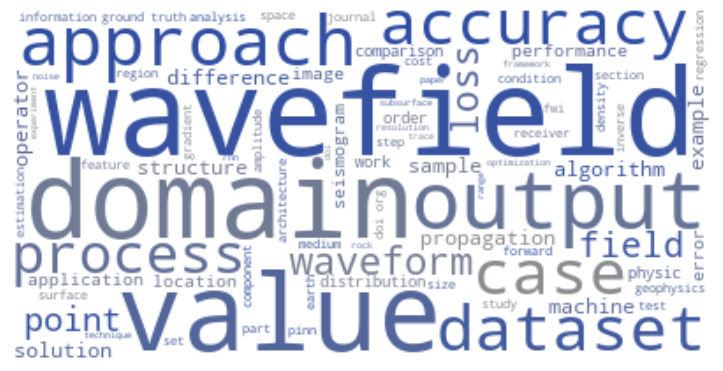

In [227]:
 

wc = WordCloud(
    background_color="white",
    colormap=blue_gray_cmap,
    random_state=1,
)

wc.generate(text_)

plt.figure(figsize=(12.0, (12.0*0.3)), constrained_layout=True)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("figs/wordcloud.svg", dpi=300)
plt.show()
 

In [228]:
wc.words_

{'wavefield': 1.0,
 'value': 0.7758620689655172,
 'domain': 0.7720306513409961,
 'output': 0.7068965517241379,
 'approach': 0.6839080459770115,
 'accuracy': 0.6628352490421456,
 'case': 0.6628352490421456,
 'dataset': 0.6609195402298851,
 'process': 0.657088122605364,
 'waveform': 0.6494252873563219,
 'loss': 0.60727969348659,
 'field': 0.6015325670498084,
 'point': 0.5957854406130269,
 'propagation': 0.5938697318007663,
 'solution': 0.578544061302682,
 'difference': 0.5402298850574713,
 'machine': 0.5134099616858238,
 'example': 0.5,
 'sample': 0.4942528735632184,
 'algorithm': 0.49233716475095785,
 'structure': 0.48659003831417624,
 'operator': 0.48084291187739464,
 'performance': 0.4789272030651341,
 'location': 0.4674329501915709,
 'application': 0.46360153256704983,
 'error': 0.4521072796934866,
 'image': 0.44061302681992337,
 'seismogram': 0.43486590038314177,
 'comparison': 0.4329501915708812,
 'physic': 0.42911877394636017,
 'work': 0.42911877394636017,
 'order': 0.409961685823